In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import ammonyte as amt
import seaborn as sns
import pandas as pd

In [2]:
color_list = sns.color_palette('colorblind')

In [3]:
data_folder = './data/8k_ice'

data = pyleo.Lipd(data_folder)

lipd_series_list = data.to_LipdSeriesList()

lipd_series_dict = {}

for series in lipd_series_list:
    ms_series = series.copy()
    print(f'{ms_series.label} : {ms_series.value_name}')
    if ms_series.label not in lipd_series_dict:
        lipd_series_dict[ms_series.label] = []
        lipd_series_dict[ms_series.label].append(series)
    else:
        lipd_series_dict[ms_series.label].append(ms_series)

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_75921/2698352364.py:3: DeprecationWarning: The Lipd class is being deprecated and will be removed in Pyleoclim v1.0.0. Functionalities will instead be handled by the pyLipd package.
  data = pyleo.Lipd(data_folder)


Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 8 LiPD file(s)
reading: Renland.Johnsen.1992.lpd
reading: EDML.Stenni.2010.lpd
reading: EPICADomeC.Stenni.2010.lpd
reading: Vostok.Vimeux.2002.lpd
reading: GISP2.Grootes.1997.lpd
reading: GRIP.GRIP.1992.lpd
reading: NGRIP.NGRIP.2004.lpd
reading: TALDICE.Mezgec.2017.lpd
Finished read: 8 records
extracting paleoData...
extracting: Renland.Johnsen.1992
extracting: EDML.Stenni.2010
extracting: EPICADomeC.Stenni.2010
extracting: Vostok.Vimeux.2002
extracting: GISP2.Grootes.1997
extracting: GRIP.GRIP.1992
extracting: NGRIP.NGRIP.2004
extracting: TALDICE.Mezgec.2017
Created time series: 39 entries
Both age and year information are available, using age
Both age and year information are available, using age
Both age and year information are available, using age
Renland.Johnsen.1992 : depth
Renland.Johnsen.1992 : age
Renland.Johnsen.1992 : d18O
EDML.Stenni.2010 : bagDepth
EDML.Stenni.2010 : age
EDML.Stenni.2010 : b

In [4]:
index_dict = {
    'GRIP.Vinther.2006' : 2,
    'Renland.Johnsen.1992' : 2,
    'GISP2.Grootes.1997' : 1,
    'NGRIP.NGRIP.2004' : 0,
}

In [5]:
ms_list = []

for label in lipd_series_dict.keys():
    if label in index_dict.keys():
        index = index_dict[label]
        for idx,series in enumerate(lipd_series_dict[label]):
            if idx == index:
                series.time_unit = 'Years BP'
                ms_list.append(series)
    else:
        continue
        

(<Figure size 640x480 with 4 Axes>,
 {0: <Axes: ylabel='d18O [permil]'>,
  1: <Axes: ylabel='d18O [permil]'>,
  2: <Axes: ylabel='d18O [permil]'>,
  3: <Axes: xlabel='Age [Years BP]'>})

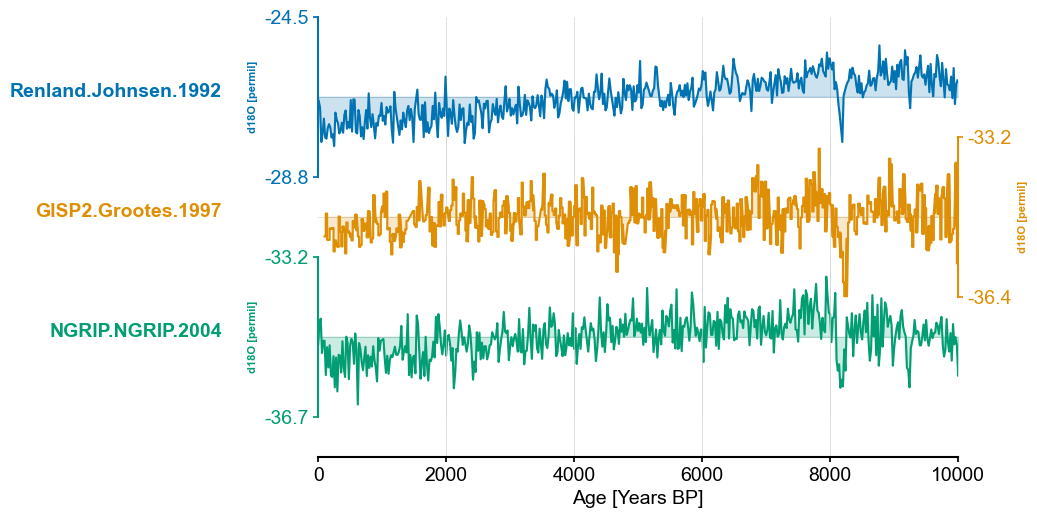

In [6]:
end_time = 10000

ms_ice = pyleo.MultipleSeries([series.slice((0,end_time)) for series in ms_list])
ms_ice.stackplot(colors=color_list[:len(ms_ice.series_list)])

In [7]:
m = 12
w_size_list = np.arange(10,51,10)
res_dict = {}
lp_dict = {}

for idx,series in enumerate(ms_ice.series_list):
    name = series.label
    print(f'Analyzing {name}')
    for w_size in tqdm(w_size_list):
        series_slice = series.slice((0,end_time))
        td = amt.TimeEmbeddedSeries(series.slice((0,end_time)),m)
        eps = td.find_epsilon(1,.05,.01,verbose=False)
        rm = eps['Output']
        lp = rm.laplacian_eigenmaps(w_size=w_size,w_incre=4)
        
        if name not in res_dict:
            res_dict[name] = []
        if name not in lp_dict:
            lp_dict[name] = []

        lp_dict[name].append(lp)

Analyzing Renland.Johnsen.1992


  0%|          | 0/5 [00:00<?, ?it/s]

/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 20%|██        | 1/5 [00:21<01:26, 21.53s/it]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 40%|████      | 2/5 [00:46<01:10, 23.56s/it]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 60%|██████    | 3/5 [01:16<00:52, 26.33s/it]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. A

Analyzing GISP2.Grootes.1997


  0%|          | 0/5 [00:00<?, ?it/s]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 20%|██        | 1/5 [00:58<03:55, 58.93s/it]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 40%|████      | 2/5 [02:33<04:00, 80.09s/it]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 60%|██████    | 3/5 [04:14<02:59, 89.59s/it]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.war

Analyzing NGRIP.NGRIP.2004


  0%|          | 0/5 [00:00<?, ?it/s]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 20%|██        | 1/5 [00:00<00:01,  2.35it/s]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 40%|████      | 2/5 [00:01<00:01,  1.95it/s]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)
 60%|██████    | 3/5 [00:01<00:01,  1.47it/s]/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.war

In [8]:
name = list(index_dict.keys())[0]

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_size_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_size = {w_size_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

KeyError: 'GRIP.Vinther.2006'

5it [00:10,  2.14s/it]


Text(0.5, 0.98, 'Renland.Johnsen.1992')

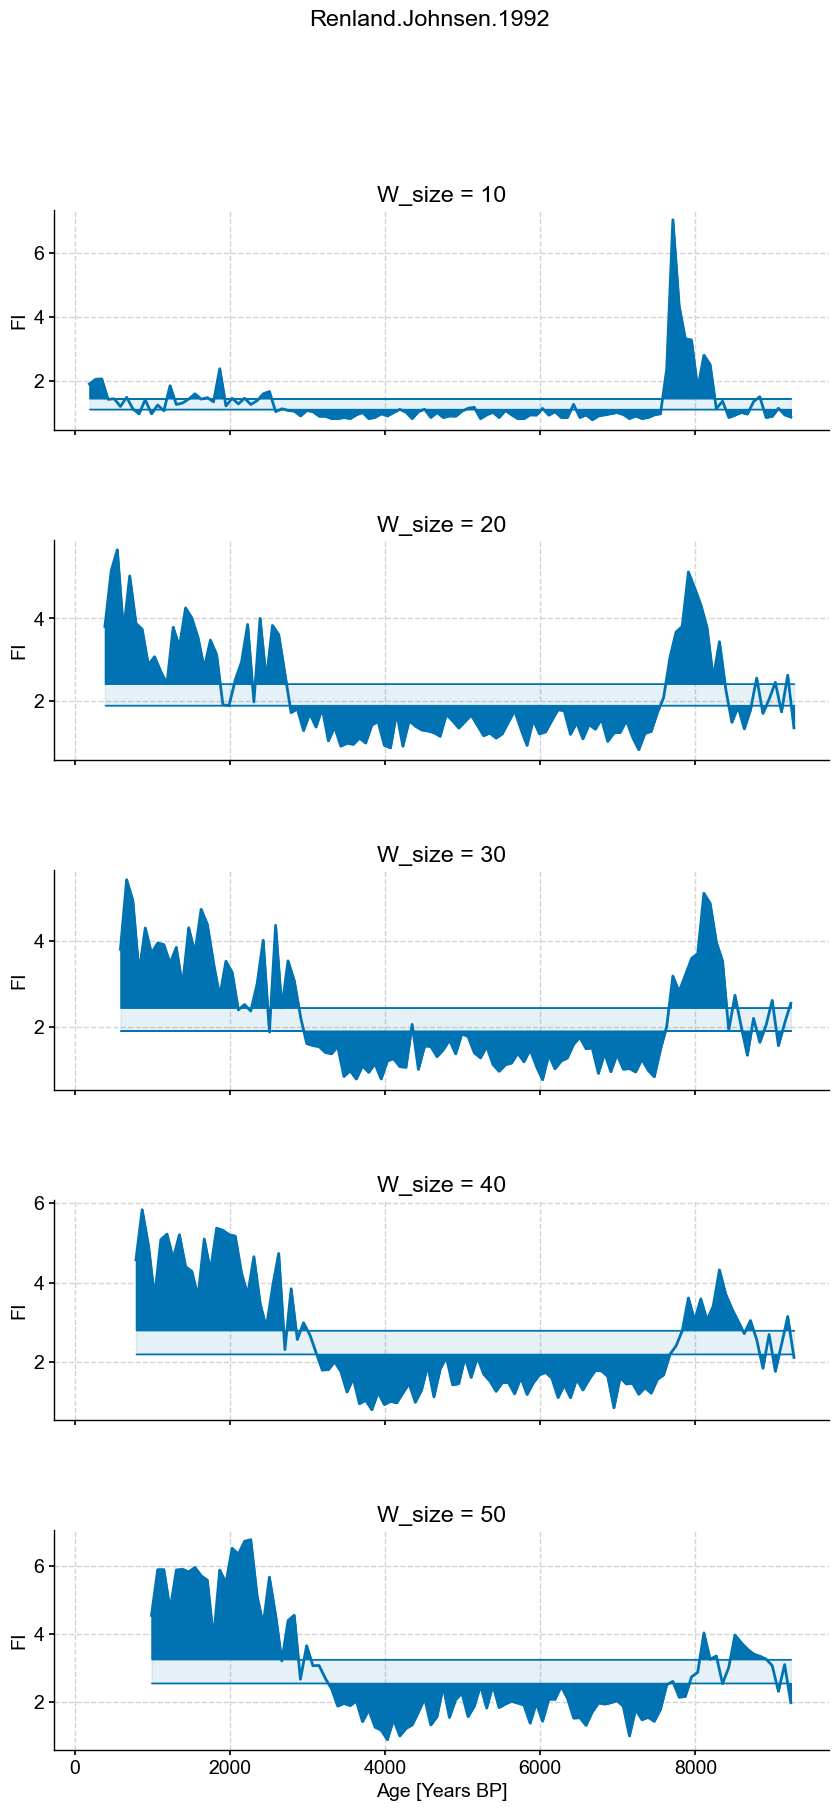

In [ ]:
name = list(index_dict.keys())[1]

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_size_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_size = {w_size_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

5it [00:11,  2.24s/it]


Text(0.5, 0.98, 'GISP2.Grootes.1997')

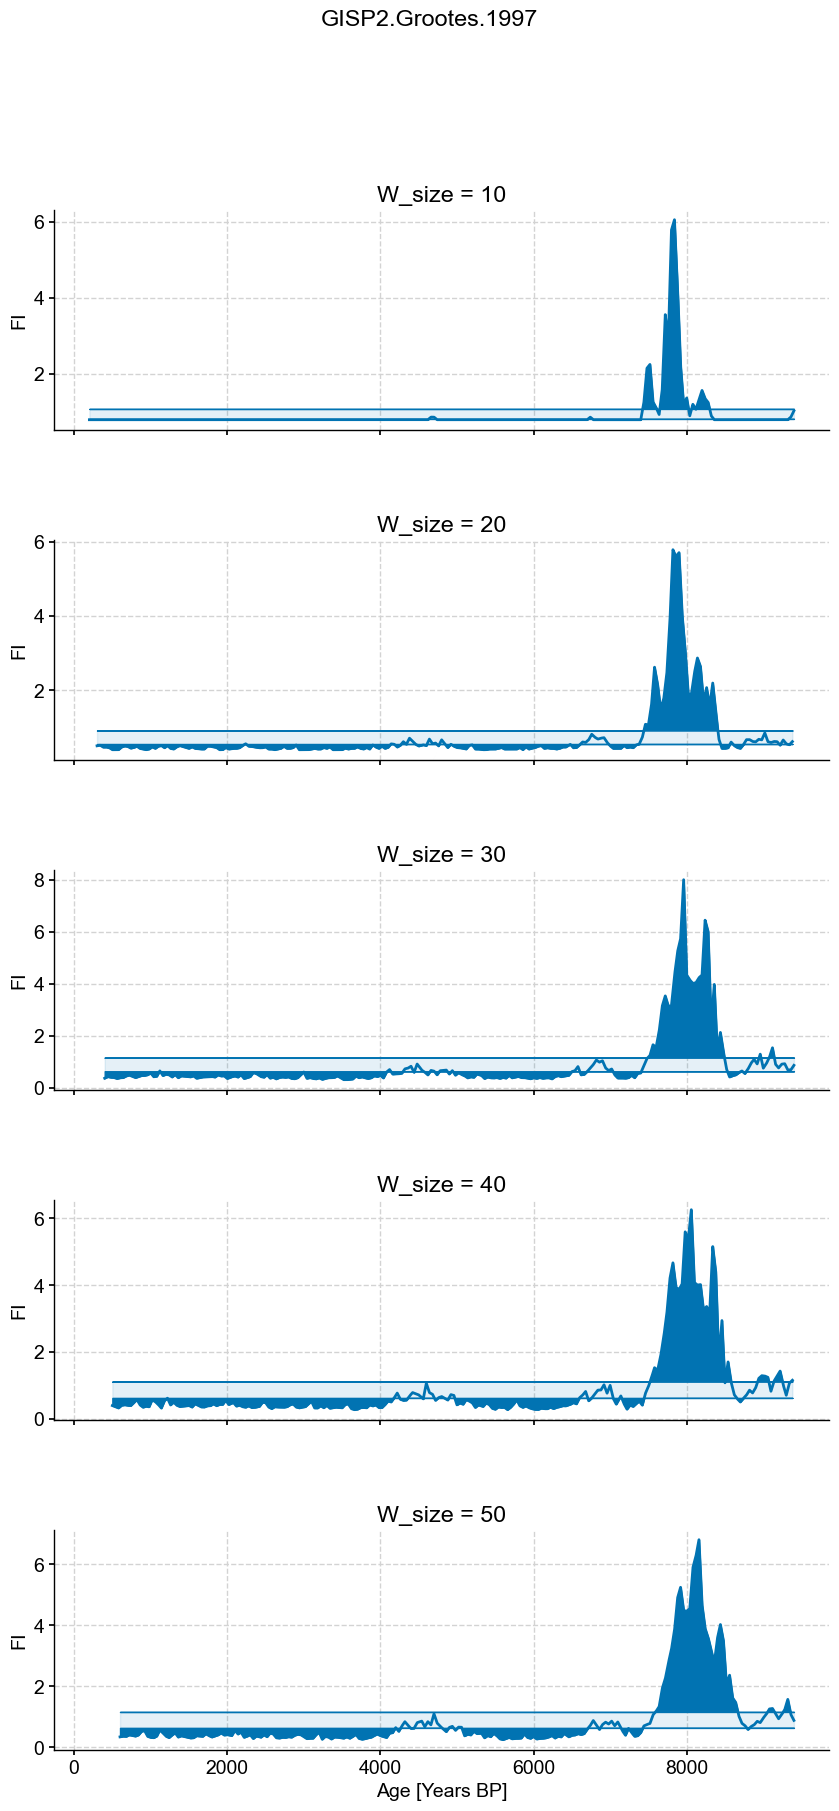

In [ ]:
name = list(index_dict.keys())[2]

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_size_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_size = {w_size_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

5it [00:10,  2.04s/it]


Text(0.5, 0.98, 'NGRIP.NGRIP.2004')

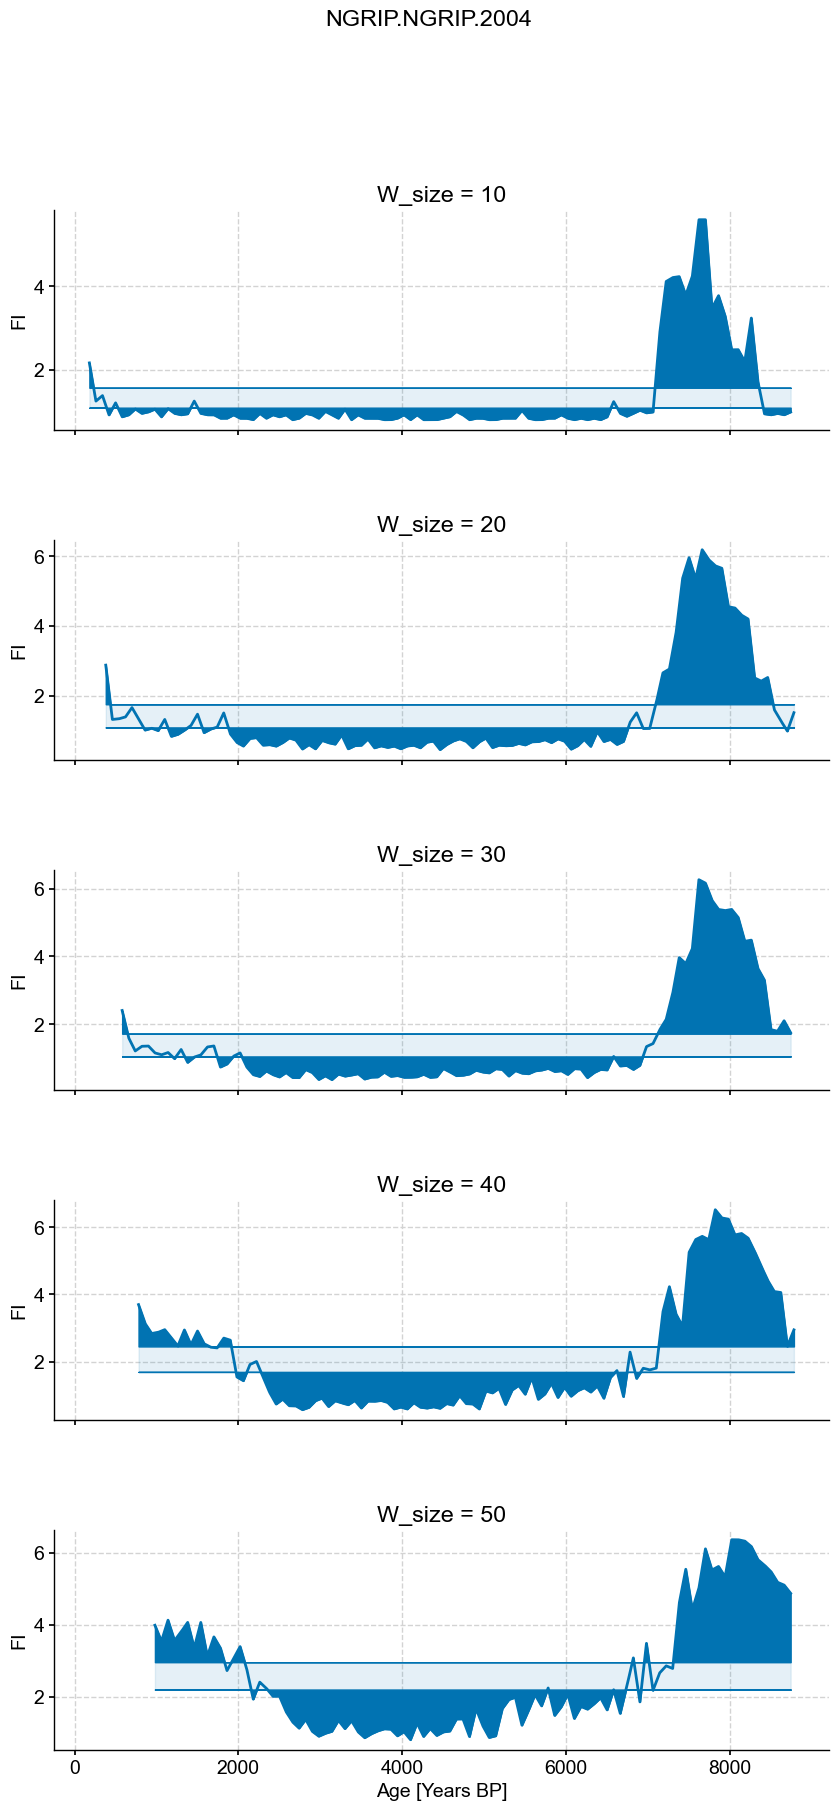

In [ ]:
name = list(index_dict.keys())[3]

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_size_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_size = {w_size_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)